<a href="https://colab.research.google.com/github/amine-mih-dev/pytorch-Deep-Learning/blob/master/04-spiral_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create the data

In [1]:
! git clone https://github.com/amine-mih-dev/pytorch-Deep-Learning
%cd /content/pytorch-Deep-Learning

Cloning into 'pytorch-Deep-Learning'...
remote: Enumerating objects: 10016, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 10016 (delta 29), reused 56 (delta 11), pack-reused 9922
Receiving objects: 100% (10016/10016), 191.87 MiB | 27.80 MiB/s, done.
Resolving deltas: 100% (5943/5943), done.
Updating files: 100% (1172/1172), done.
/content/pytorch-Deep-Learning


In [2]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [3]:
from res.plot_lib import plot_data, plot_model, set_default

In [5]:
set_default()

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
seed = 42
random.seed(seed) 
torch.manual_seed(seed)
N = 1000 # num_samples_per_class
D = 2 # dimensions
C = 3 # num_classes
H = 100 # mun_hidden_classes

In [22]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype = torch.long).to(device)

for c in range(C):
  index = 0
  t = torch.linspace(0, 1, N)
  # when c = 0 and t = 0: start of linespace (lower limit?)
  # when c = 0 amd t = 1: end of linespace (upper limit?)
  # this inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_var)
  inner_var = torch.linspace(
      # when t = 0
      (2 * math.pi / C)* (c),
      # when t = 1
      ( 2 * math.pi / C) * (2 + c),
      N
  ) + torch.randn(N) * 0.2

  for ix in range(N*c, N*(c+1)):
    X[ix] = t[index] * torch.FloatTensor((
        math.sin(inner_var[index]),math.cos(inner_var[index])
    ))
    y[ix] = c
    index += 1



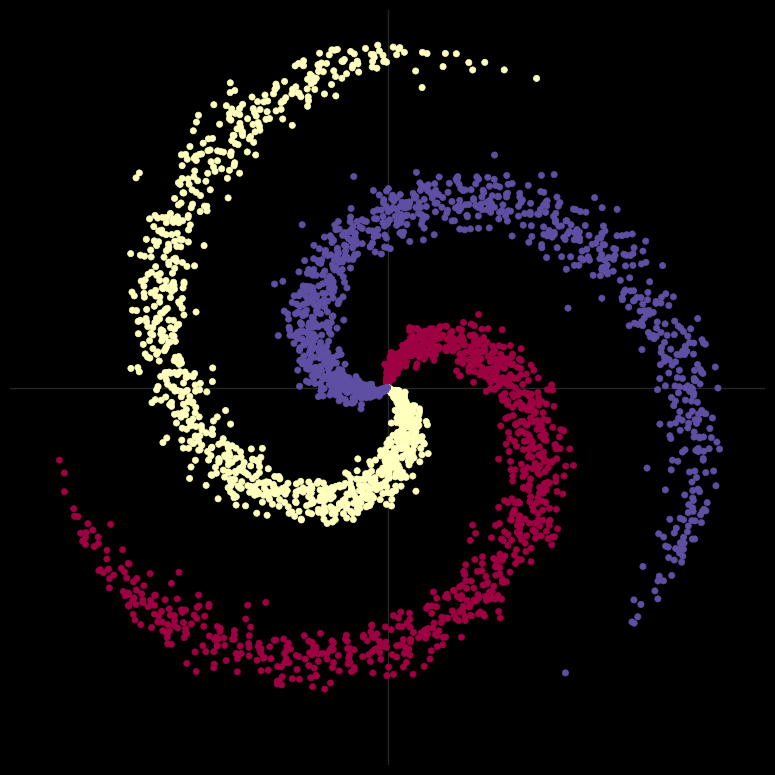

In [23]:
plot_data(X,y)

### Linear model

In [24]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [28]:
# nn package to create our linear model
# each linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification tasks
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descnet for our paramater updates
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= lambda_l2) # built-in L2

# Training
for t in range(1000): # 1000 epoch

  # Feed forward to get the logits
  y_pred = model(X) # get the predictions to evaluate loss based on cross entropy with truth values

  # compute loss and accuracy
  loss = criterion(y_pred, y)
  score, predicted = torch.max(y_pred, 1)
  acc = (y == predicted).sum().float() / len(y)
  print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc)) 
  display.clear_output(wait=True)

  # zero the gradients before running the backward pass 
  # (we dont want old gradient values to cause an unwanted bias)
  optimizer.zero_grad()

  # backward pass to compute the gradient
  # of loss w.r.t our learnable params.
  loss.backward()

  #Update params
  optimizer.step()

[EPOCH]: 999, [LOSS]: 0.778498, [ACCURACY]: 0.498


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


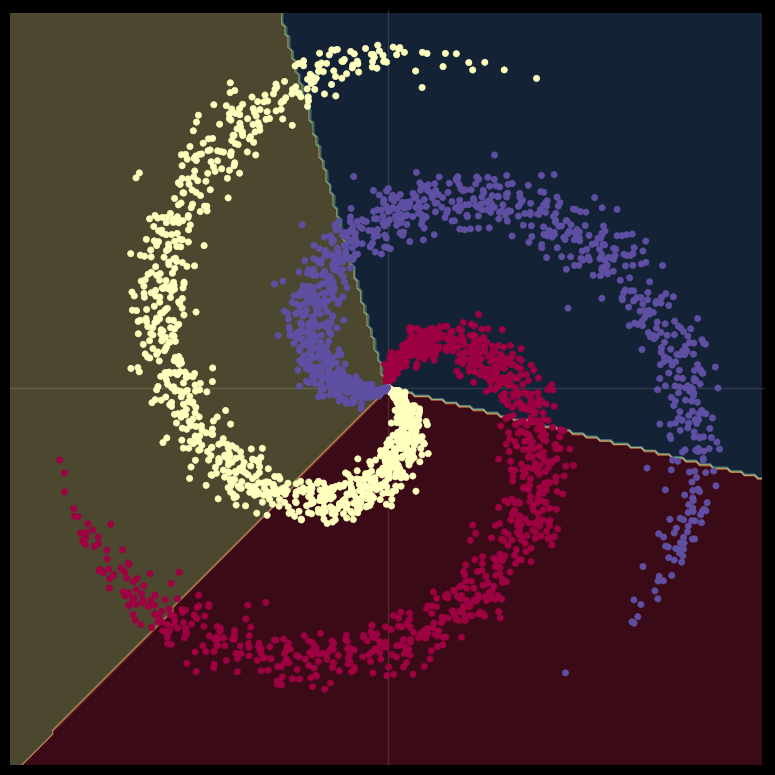

In [29]:
# plot trained model
print(model)
plot_model(X, y, model)

### Two-layered network

In [42]:
learning_rate = 5e-3
lambda_l2 = 5e-5

In [64]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.GELU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1500):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 1499, [LOSS]: 0.023978, [ACCURACY]: 0.999


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): GELU(approximate='none')
  (2): Linear(in_features=100, out_features=3, bias=True)
)


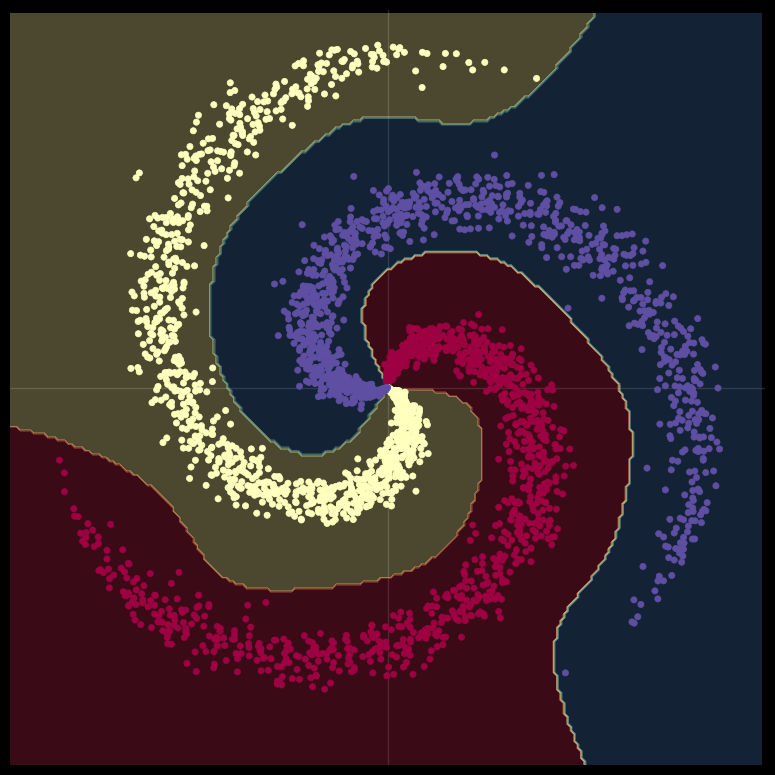

In [65]:
# Plot trained model
print(model)
plot_model(X, y, model)